<a href="https://colab.research.google.com/github/FranziskoB/Classificacao_Redes_Neurais/blob/main/Classifica%C3%A7%C3%A3o_com_rede_neural_Human_activity_recognition_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelagem de 'human activity recognition

###Sobre o conjunto de dados
O banco de dados de Reconhecimento de Atividade Humana foi construído a partir das gravações de 30 participantes do estudo realizando atividades da vida diária (AVD) enquanto carregavam um smartphone montado na cintura com sensores inerciais embutidos. O objetivo é classificar as atividades em uma das seis atividades realizadas.

###Descrição do experimento
Os experimentos foram realizados com um grupo de 30 voluntários na faixa etária de 19 a 48 anos. Cada pessoa realizou seis atividades (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) usando um smartphone (Samsung Galaxy S II) na cintura. Usando seu acelerômetro e giroscópio incorporados, capturamos aceleração linear 3-axial e velocidade angular 3-axial a uma taxa constante de 50 Hz. Os experimentos foram gravados em vídeo para rotular os dados manualmente. O conjunto de dados obtido foi particionado aleatoriamente em dois conjuntos, onde 70% dos voluntários foram selecionados para gerar os dados de treinamento e 30% os dados de teste.

Os sinais dos sensores (acelerômetro e giroscópio) foram pré-processados pela aplicação de filtros de ruído e então amostrados em janelas deslizantes de largura fixa de 2,56 segundos e 50% de sobreposição (128 leituras/janela). O sinal de aceleração do sensor, que possui componentes gravitacionais e de movimento corporal, foi separado usando um filtro passa-baixa Butterworth em aceleração corporal e gravidade. A força gravitacional é assumida como tendo apenas componentes de baixa frequência, portanto, um filtro com frequência de corte de 0,3 Hz foi usado. De cada janela, um vetor de características foi obtido calculando variáveis do domínio do tempo e da frequência.

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow
from tensorflow import keras

importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train= pd.read_csv("/content/drive/MyDrive/MBA DSA/HAR_train.csv")
test= pd.read_csv("/content/drive/MyDrive/MBA DSA/HAR_test.csv")

visualizando os dados

In [ ]:
test.head(5)

,V1,X1tBodyAcc.mean.X,X2tBodyAcc.mean.Y,X3tBodyAcc.mean.Z,X4tBodyAcc.td.X,X5tBodyAcc.td.Y,X6tBodyAcc.td.Z,X7tBodyAcc.mad.X,X8tBodyAcc.mad.Y,X9tBodyAcc.mad.Z,...,X553fBodyBodyGyroJerkMag.kewne,X554fBodyBodyGyroJerkMag.kurtoi,X555angletBodyAccMeangravity,X556angletBodyAccJerkMeangravityMean,X557angletBodyGyroMeangravityMean,X558angletBodyGyroJerkMeangravityMean,X559angleXgravityMean,X560angleYgravityMean,X561angleZgravityMean,y
0,5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,em pé
1,5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,em pé
2,5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,em pé
3,5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,em pé
4,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,em pé


In [ ]:
import plotly.express as px
freq=pd.DataFrame(train.y.value_counts())
fig = px.bar(freq, x=freq.index, y='y',title="Distribuição de frequencia das variáveis")
fig.update_layout(
    xaxis_title="Tipo de movimento/posição",
    yaxis_title="Frequencia",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

## Criando uma rede neural

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


## Preparação dos dados

In [ ]:
test['V1']=test['V1']-1# passando o rotulo 1 para 0, 2 para 1 e assim por diante
train['V1']=train['V1']-1

In [ ]:
y_train=train['V1'].to_numpy().astype('int')#Definindo dados de treino
x_train=x_scaled = min_max_scaler.fit_transform(train.drop(['y', 'V1'], axis=1).to_numpy().astype('float32'))#Definindo dados de treino
y_teste=test['V1'].to_numpy()#Definindo dados de validação
x_teste=x_scaled = min_max_scaler.fit_transform(test.drop(['y', 'V1'], axis=1).to_numpy().astype('float32'))#Definindo dados de validação

## Definindo rede neural

In [ ]:

modelo = keras.Sequential([
    keras.layers.Dense(561, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
184/184 [==============================] - 9s 10ms/step - loss: 0.4856 - accuracy: 0.8118 - val_loss: 0.2883 - val_accuracy: 0.8763
Epoch 2/50
184/184 [==============================] - 1s 8ms/step - loss: 0.2163 - accuracy: 0.9211 - val_loss: 0.1865 - val_accuracy: 0.9395
Epoch 3/50
184/184 [==============================] - 2s 12ms/step - loss: 0.1605 - accuracy: 0.9395 - val_loss: 0.1474 - val_accuracy: 0.9347
Epoch 4/50
184/184 [==============================] - 2s 9ms/step - loss: 0.1351 - accuracy: 0.9481 - val_loss: 0.1348 - val_accuracy: 0.9436
Epoch 5/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1175 - accuracy: 0.9541 - val_loss: 0.1298 - val_accuracy: 0.9409
Epoch 6/50
184/184 [==============================] - 1s 6ms/step - loss: 0.0946 - accuracy: 0.9650 - val_loss: 0.1450 - val_accuracy: 0.9368
Epoch 7/50
184/184 [==============================] - 1s 4ms/step - loss: 0.0980 - accuracy: 0.9616 - val_loss: 0.1316 - val_accuracy: 0.9456
Epoc

## Métricas de avaliação

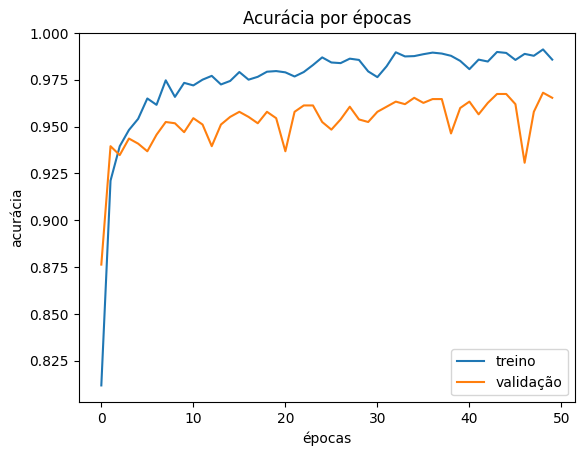

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

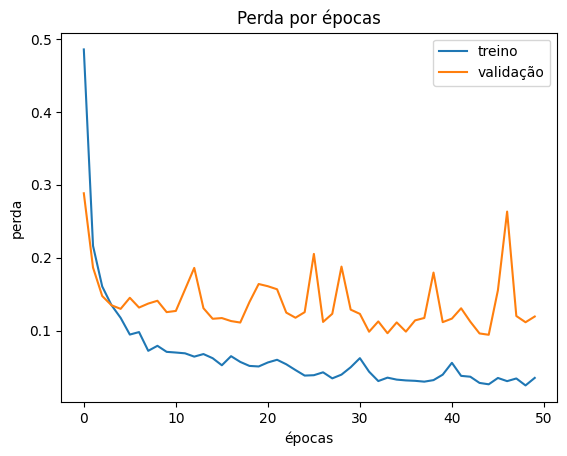

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
from numpy import std
from sklearn.metrics import accuracy_score

In [ ]:
testes=modelo.predict(x_teste)
yhat=np.argmax(testes, axis=1)
previsoes= pd.DataFrame(yhat)
teste_y=test['V1']

acuracia_GB = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia_GB)

93/93 [==============================] - 0s 2ms/step
A acurácia foi 86.63%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       496
           1       0.98      0.81      0.89       471
           2       0.78      1.00      0.87       420
           3       0.66      0.98      0.79       491
           4       0.97      0.54      0.69       532
           5       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.89      0.87      0.86      2947
weighted avg       0.90      0.87      0.86      2947



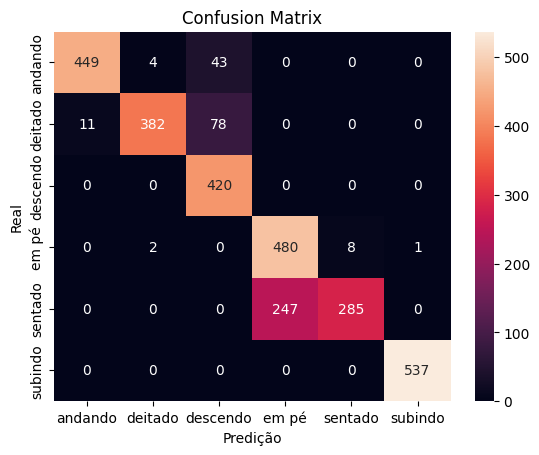

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(teste_y, previsoes, labels=None, sample_weight=None)

# Plot

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']); ax.yaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']);
plt.show()